In [4]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np

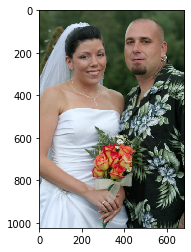

In [6]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

image = cv2.imread('img.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
image = cv2.imread('img.jpg')
result_image = image.copy()

# Specify the trained cascade classifier
face_cascade_name = "haarcascade_frontalface_default.xml"

# Create a cascade classifier
face_cascade = cv2.CascadeClassifier()

# Load the specified classifier
face_cascade.load(face_cascade_name)

#Preprocess the image
grayimg  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayimg = cv2.equalizeHist(grayimg)

#Run the classifiers
faces = face_cascade.detectMultiScale(grayimg, 1.1, 2, 0)

print ("Faces detected")

if len(faces) != 0:         # If there are faces in the images
    for f in faces:         # For each face in the image

        # Get the origin co-ordinates and the length and width till where the face extends
        x, y, w, h = [ v for v in f ]

        # get the rectangle img around all the faces
        cv2.rectangle(image, (x,y), (x+w,y+h), (255,255,0), 5)
        sub_face = image[y:y+h, x:x+w]
        # apply a gaussian blur on this new recangle image
        sub_face = cv2.GaussianBlur(sub_face,(23, 23), 30)
        # merge this blurry rectangle to our final image
        result_image[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face
        face_file_name = "./face_" + str(y) + ".jpg"
        cv2.imwrite(face_file_name, sub_face)

# cv2.imshow("Detected face", result_image)
cv2.imwrite("./result.png", result_image)

Faces detected


True

In [36]:
test = cv2.imread('test.jpg')
result_test = test.copy()

# Specify the trained cascade classifier
face_cascade_name = "haarcascade_frontalface_default.xml"

# Create a cascade classifier
face_cascade = cv2.CascadeClassifier()

# Load the specified classifier
face_cascade.load(face_cascade_name)

#Preprocess the test
grayimg  = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
grayimg = cv2.equalizeHist(grayimg)

#Run the classifiers
faces = face_cascade.detectMultiScale(grayimg, 1.1, 2, 0)

print ("Faces detected")

if len(faces) != 0:         # If there are faces in the tests
    for f in faces:         # For each face in the test

        # Get the origin co-ordinates and the length and width till where the face extends
        x, y, w, h = [ v for v in f ]

        # get the rectangle img around all the faces
        cv2.rectangle(test, (x,y), (x+w,y+h), (255,255,0), 5)
        sub_face = test[y:y+h, x:x+w]
        # apply a gaussian blur on this new recangle test
        sub_face = cv2.GaussianBlur(sub_face,(23, 23), 30)
        # merge this blurry rectangle to our final test
        result_test[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face

# cv2.imshow("Detected face", result_test)
cv2.imwrite("./result.png", result_test)

Faces detected


True

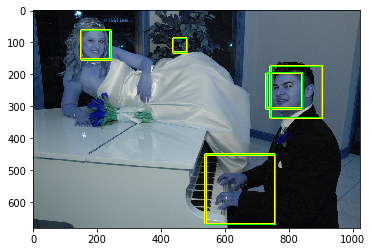

In [33]:
for (x, y, w, h) in faces:
    face_detect = cv.rectangle(test, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(face_detect)

In [7]:
img_color = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img_grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(img_grey,\
                                      scaleFactor=1.1,\
                                      minNeighbors=5,\
                                      minSize=(20, 20),\
                                      flags = cv.CASCADE_SCALE_IMAGE)
print("Found {0} faces!".format(len(faces)))

Found 3 faces!


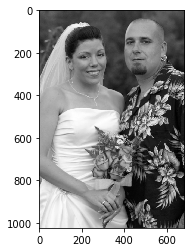

In [8]:
plt.imshow(img_grey, cmap = 'gray')

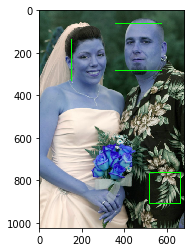

In [9]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    face_detect = cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(face_detect)

In [16]:
def find_and_blur(bw, color): 
    # detect al faces
    faces = face_cascade.detectMultiScale(bw, 1.1, 4)
    # get the locations of the faces
    for (x, y, w, h) in faces:
        # select the areas where the face was found
        roi_color = color[y:y+h, x:x+w]
        # blur the colored image
        blur = cv2.GaussianBlur(roi_color, (101,101), 0)        
        # Insert ROI back into image
        color[y:y+h, x:x+w] = blur            
    
    # return the blurred image
    return color

In [18]:
find_and_blur(img_grey, img_color)

array([[[ 70,  90,  55],
        [ 74,  94,  59],
        [ 75,  95,  60],
        ...,
        [ 67,  86,  56],
        [ 66,  85,  55],
        [ 66,  85,  55]],

       [[ 70,  90,  55],
        [ 73,  93,  58],
        [ 74,  94,  59],
        ...,
        [ 65,  84,  54],
        [ 65,  84,  54],
        [ 64,  83,  53]],

       [[ 69,  89,  54],
        [ 71,  91,  56],
        [ 72,  92,  57],
        ...,
        [ 65,  84,  54],
        [ 65,  84,  54],
        [ 64,  83,  53]],

       ...,

       [[210, 223, 239],
        [209, 222, 238],
        [203, 219, 235],
        ...,
        [120,  83,  74],
        [119,  82,  73],
        [119,  81,  72]],

       [[208, 221, 237],
        [208, 221, 237],
        [202, 218, 234],
        ...,
        [121,  83,  74],
        [119,  81,  72],
        [117,  79,  70]],

       [[207, 220, 236],
        [207, 220, 236],
        [201, 217, 233],
        ...,
        [119,  81,  72],
        [117,  79,  70],
        [115,  77,  68]]

In [39]:
import face_recognition
image = face_recognition.load_image_file("test.jpg")
face_locations = face_recognition.face_locations(image)

In [40]:
face_locations

[(199, 832, 307, 724), (72, 237, 146, 162)]